# EOPatch visualization

This tutorial showcases `EOPatch` visualization functionalities. We are going to load and visualize features from _TestEOPatch_.

In [1]:
%matplotlib inline

import os

from eolearn.core import EOPatch, FeatureType

EOPATCH_PATH = os.path.join("..", "..", "example_data", "TestEOPatch")

eopatch = EOPatch.load(EOPATCH_PATH)
eopatch

EOPatch(
  data={
    BANDS-S2-L1C: numpy.ndarray(shape=(68, 101, 100, 13), dtype=float32)
    CLP: numpy.ndarray(shape=(68, 101, 100, 1), dtype=float32)
    CLP_MULTI: numpy.ndarray(shape=(68, 101, 100, 1), dtype=float32)
    CLP_S2C: numpy.ndarray(shape=(68, 101, 100, 1), dtype=float32)
    NDVI: numpy.ndarray(shape=(68, 101, 100, 1), dtype=float32)
    REFERENCE_SCENES: numpy.ndarray(shape=(5, 101, 100, 13), dtype=float32)
  }
  mask={
    CLM: numpy.ndarray(shape=(68, 101, 100, 1), dtype=uint8)
    CLM_INTERSSIM: numpy.ndarray(shape=(68, 101, 100, 1), dtype=bool)
    CLM_MULTI: numpy.ndarray(shape=(68, 101, 100, 1), dtype=bool)
    CLM_S2C: numpy.ndarray(shape=(68, 101, 100, 1), dtype=bool)
    IS_DATA: numpy.ndarray(shape=(68, 101, 100, 1), dtype=uint8)
    IS_VALID: numpy.ndarray(shape=(68, 101, 100, 1), dtype=bool)
  }
  scalar={
    CLOUD_COVERAGE: numpy.ndarray(shape=(68, 1), dtype=float16)
  }
  label={
    IS_CLOUDLESS: numpy.ndarray(shape=(68, 1), dtype=bool)
    RANDOM_DIG

## Basics

All visualizations can be done simply by calling `EOPatch.plot` method, however calling this method still requires that `eo-learn-visualization` subpackage is installed.

Plotting a simple timeless single-channel feature produces a single-image plot. Plotting method always returns a 2D grid of `AxesSubplot` objects which can be further customized before a plot is produced.

A 2D grid: [[<AxesSubplot:>]]


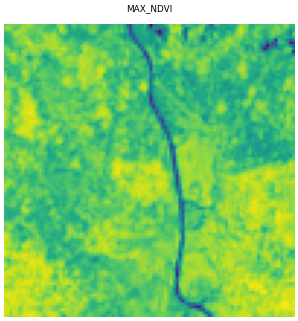

In [2]:
axes_grid = eopatch.plot((FeatureType.DATA_TIMELESS, "MAX_NDVI"))

print("A 2D grid:", axes_grid)

figure = axes_grid[0][0].figure
figure.set_dpi(40)

## Plotting filters and configurations

Let's plot a feature containing Sentinel-2 bands. It will create a grid of subplots where every row contains images for the same timestamp and every column contains images from the same channel.

Because plotting a grid of `68 x 13` images would take too much time and memory we'll use filters to plot only some timestamps and channels. Filtering parameters support either a slice object or a list of indices to keep. Additionally, we can write the names of channels to be written next to each image.

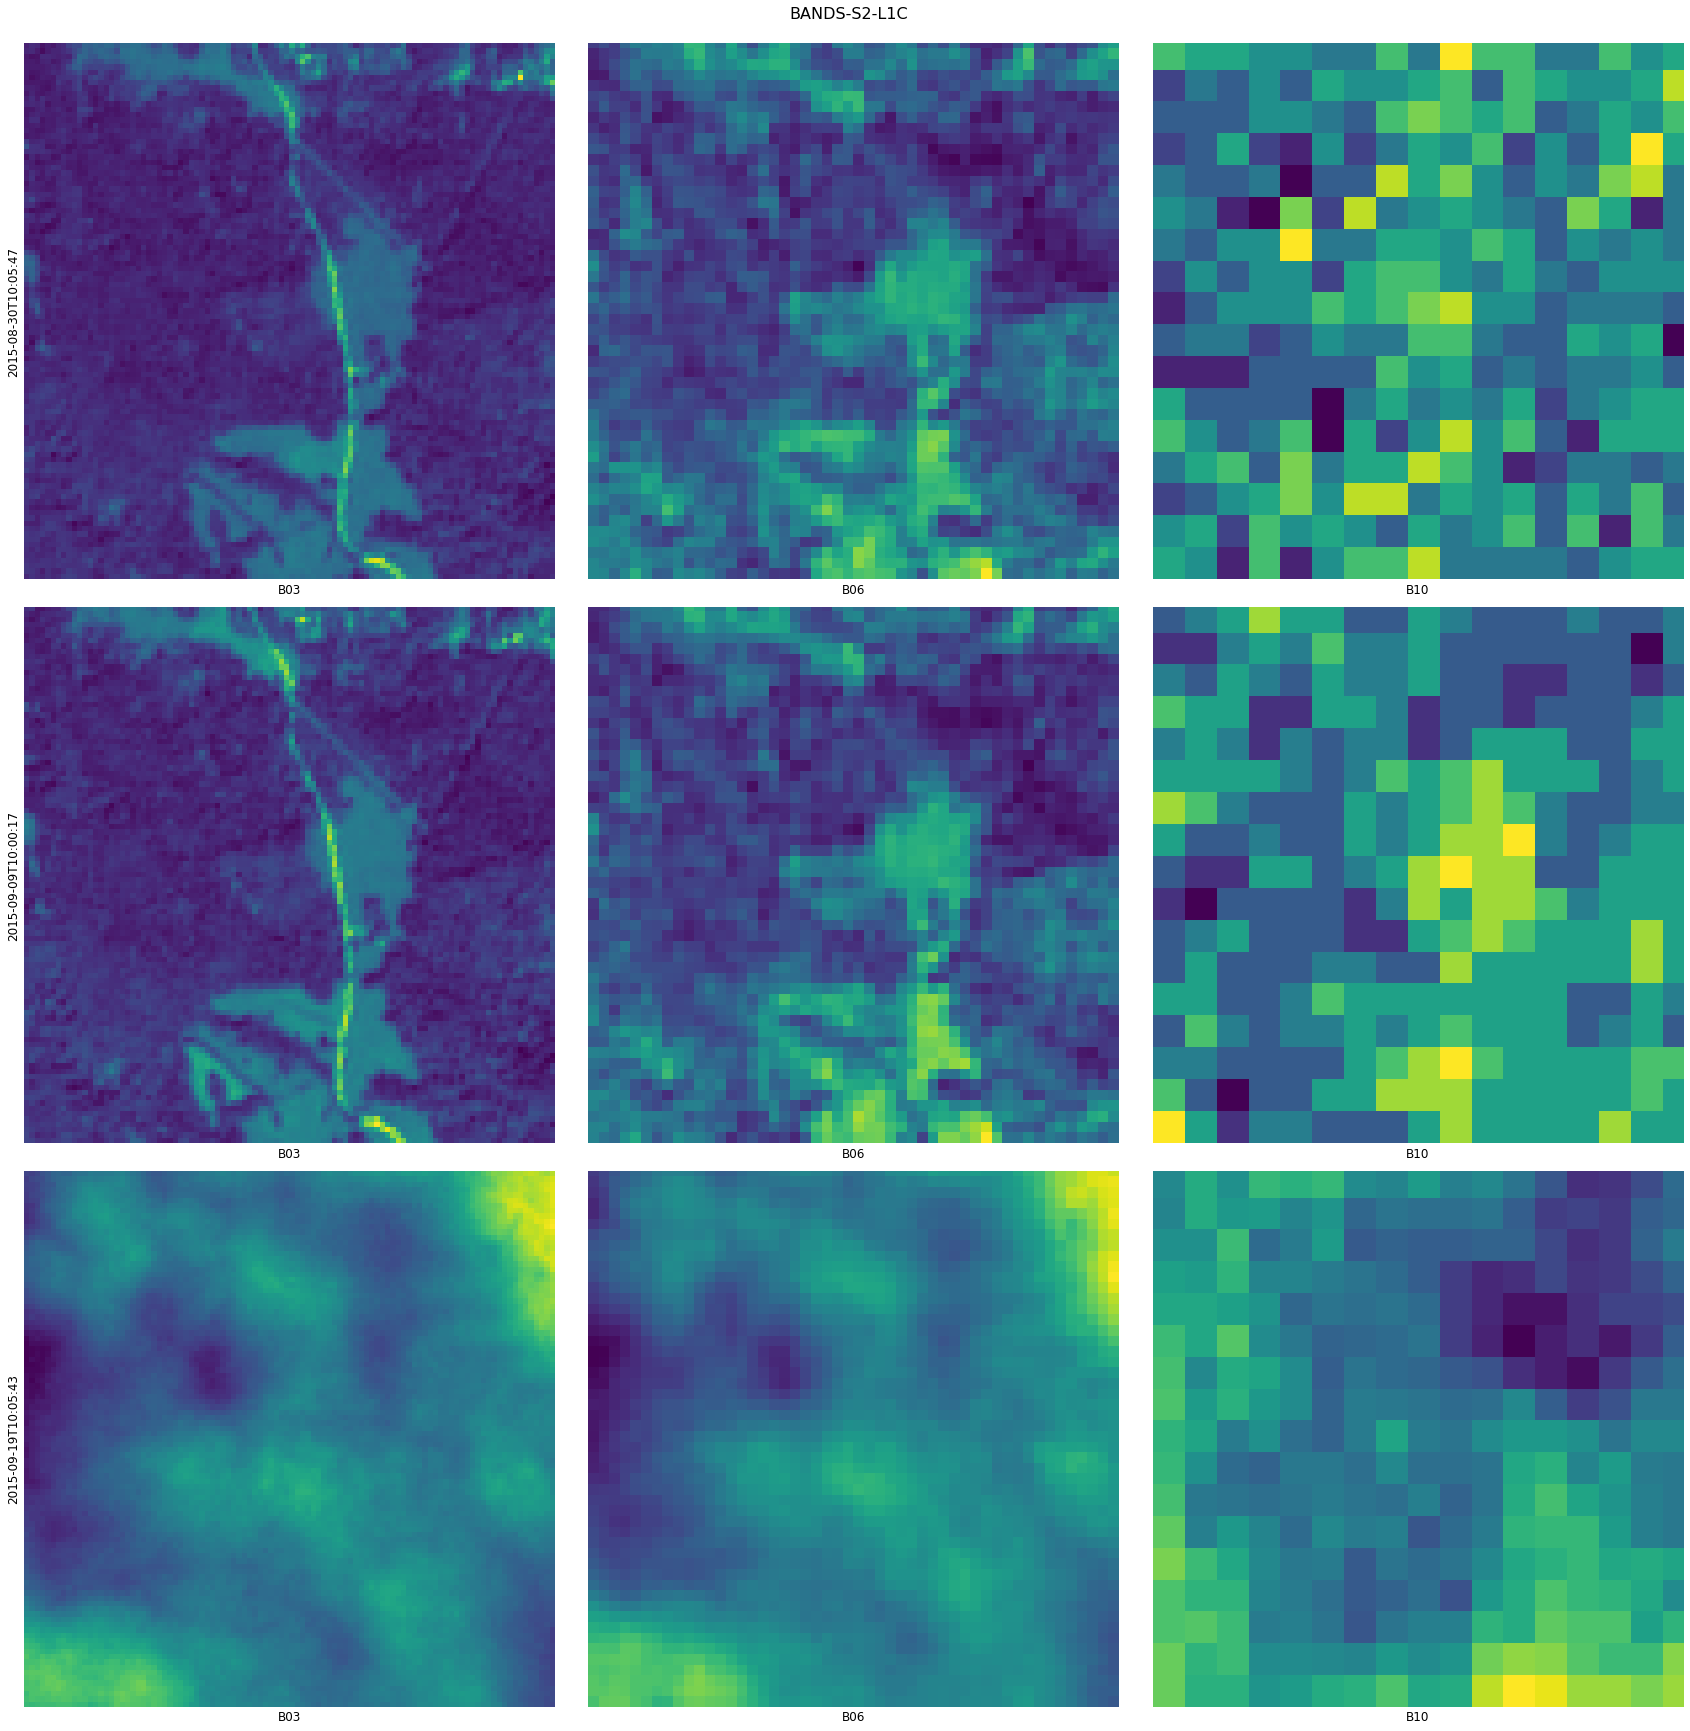

In [3]:
eopatch.plot(
    (FeatureType.DATA, "BANDS-S2-L1C"), times=slice(3, 6), channels=[2, 5, 10], channel_names=["B03", "B06", "B10"]
);

We can also select any 3 channels and plot RGB images.

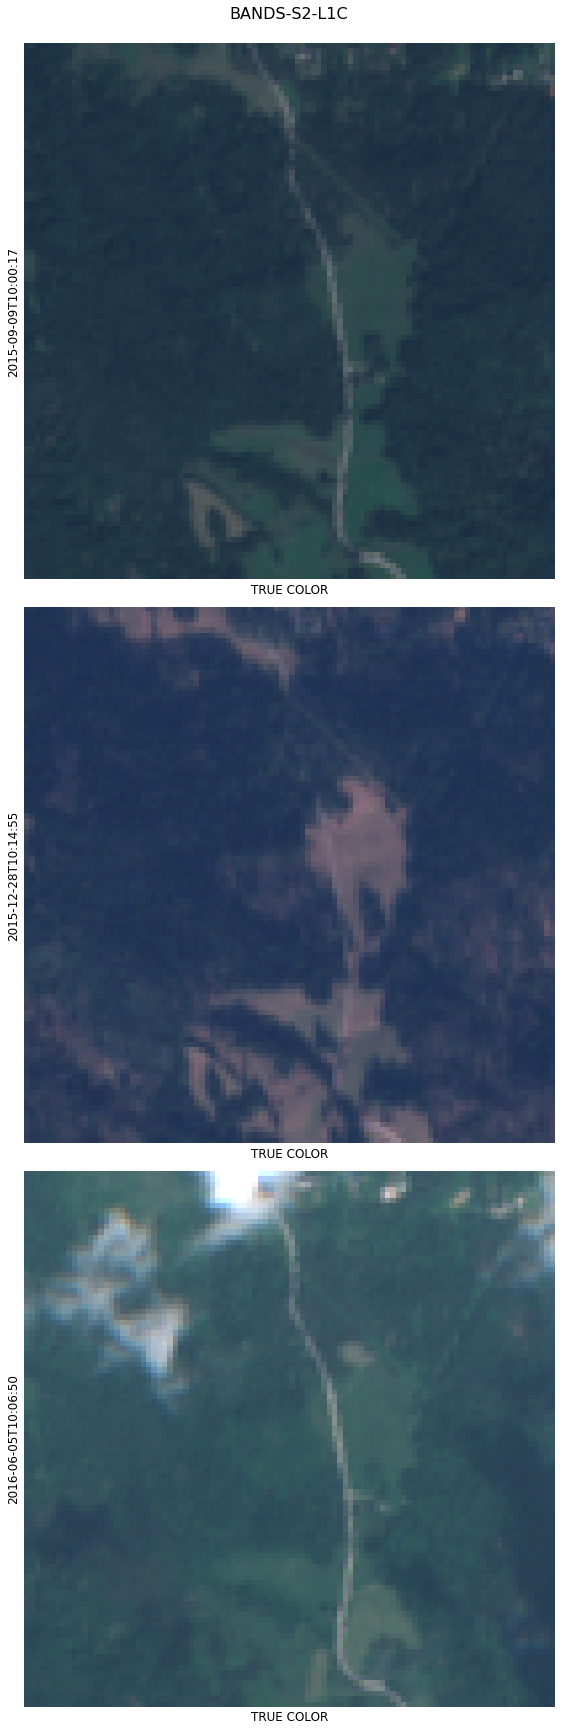

In [4]:
eopatch.plot((FeatureType.DATA, "BANDS-S2-L1C"), times=[4, 10, 20], rgb=[3, 2, 1], channel_names=["TRUE COLOR"]);

Plotting also supports plenty of advanced low-level configuration options. Those can be configured with a `PlotConfig` object.

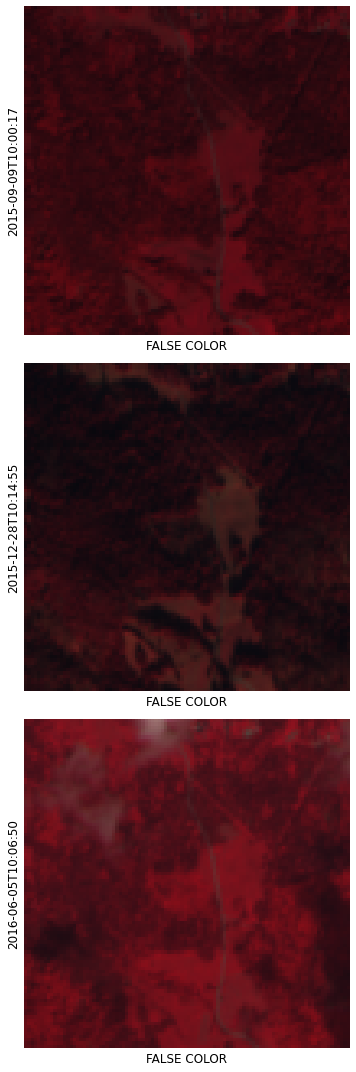

In [5]:
from eolearn.visualization import PlotConfig

config = PlotConfig(subplot_width=5, subplot_height=5, rgb_factor=1, show_title=False)

eopatch.plot(
    (FeatureType.DATA, "BANDS-S2-L1C"), times=[4, 10, 20], rgb=[7, 3, 2], channel_names=["FALSE COLOR"], config=config
);

## Types of plots

Next, let's check what kind of plots other feature types produce. Non-spatial temporal raster features are plotted as time series of values.

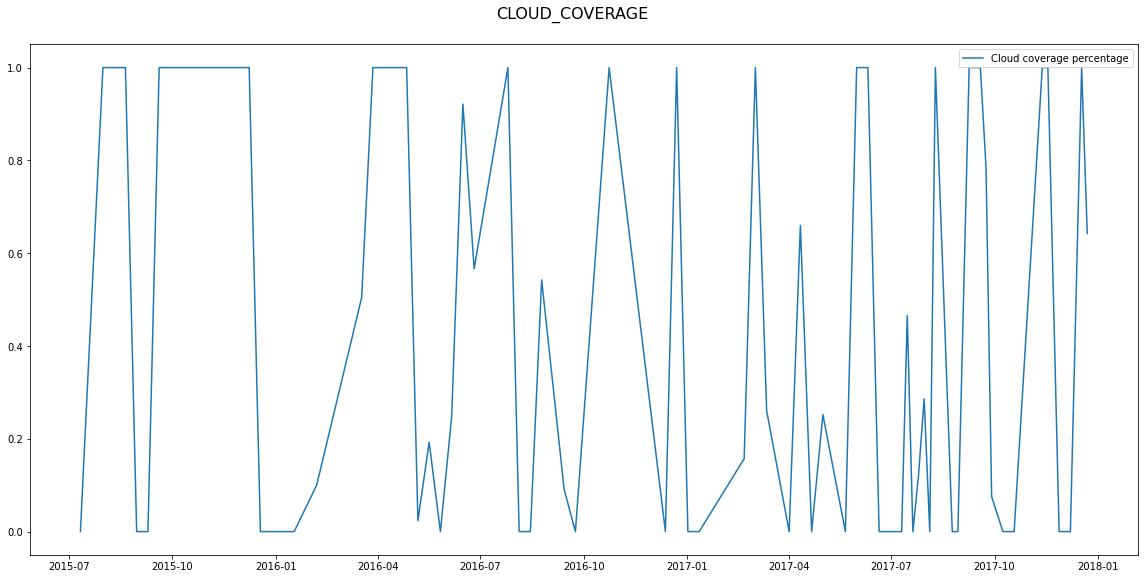

In [6]:
eopatch.plot(
    (FeatureType.SCALAR, "CLOUD_COVERAGE"),
    channel_names=["Cloud coverage percentage"],
    config=PlotConfig(subplot_width=16),
);

Timeless non-spatial raster features produce histogram plots.

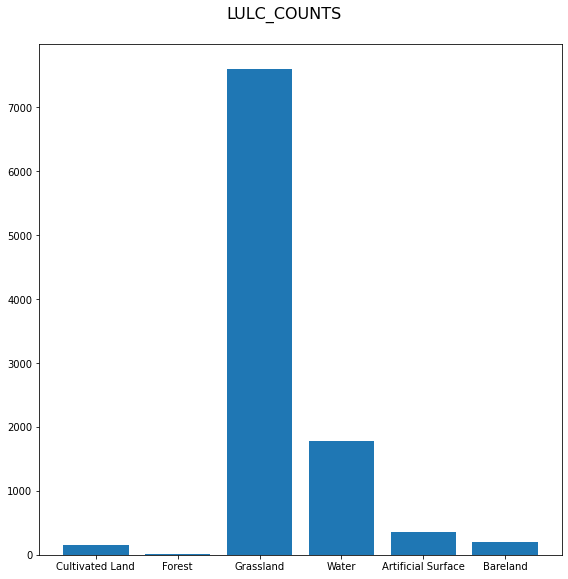

In [7]:
eopatch.plot(
    (FeatureType.LABEL_TIMELESS, "LULC_COUNTS"),
    channel_names=["Cultivated Land", "Forest", "Grassland", "Water", "Artificial Surface", "Bareland"],
);

Vector features are plotted together with an `EOPatch` bounding box.

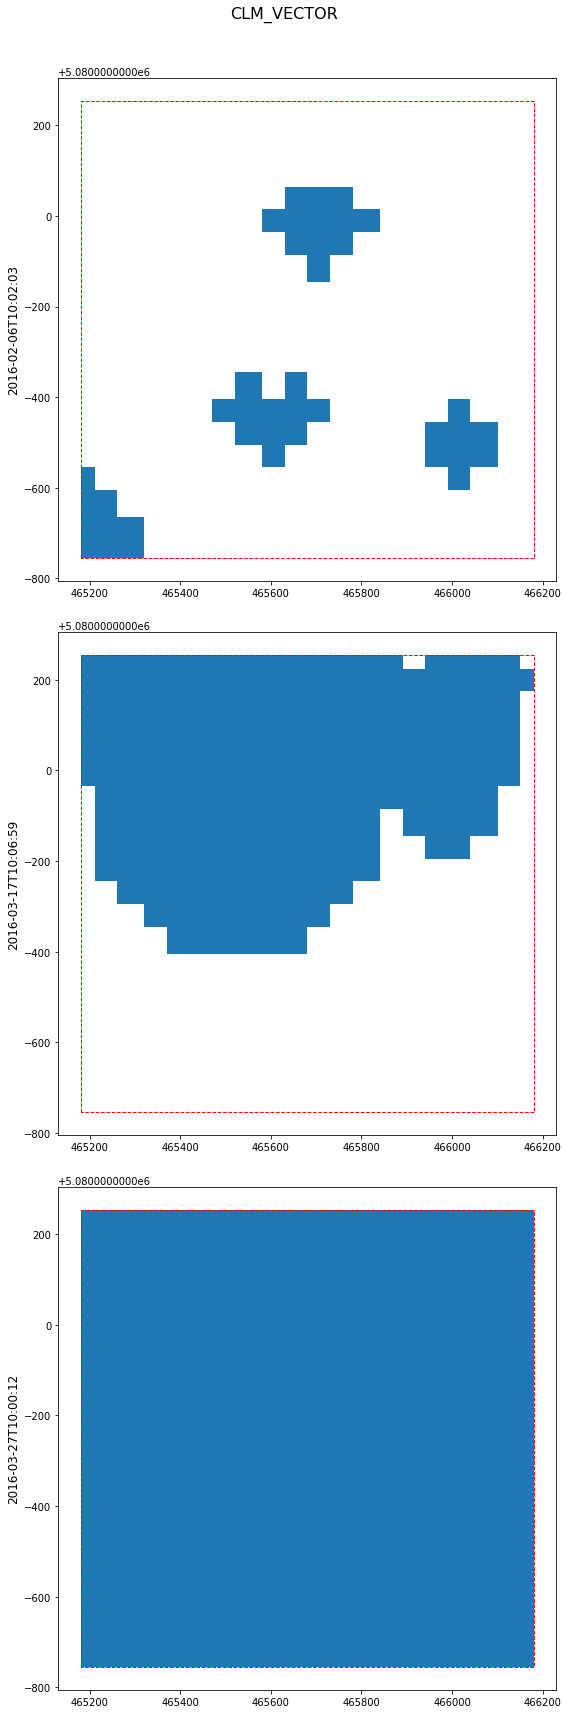

In [8]:
eopatch.plot((FeatureType.VECTOR, "CLM_VECTOR"), times=slice(6, 9));

Additionally we can plot a bounding box feature on its own.

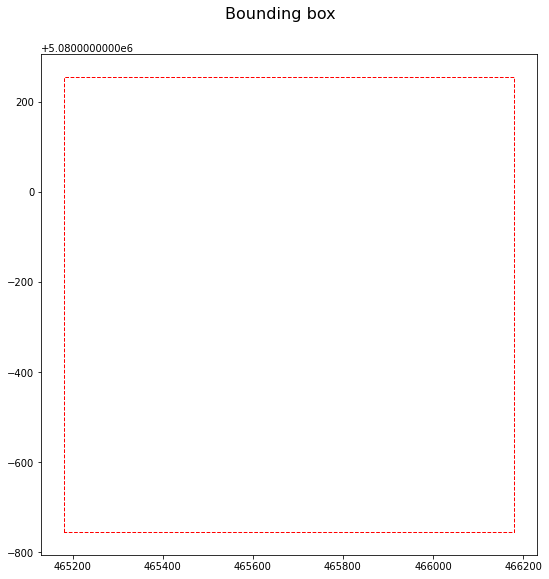

In [9]:
eopatch.plot(FeatureType.BBOX);